In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler

In [2]:
ls ../raw_data/

rawg_games.csv       rawg_users.csv       steam_games.csv
rawg_user_games.csv  steam-200k.csv


In [3]:
# def get_user_data_steam():
#     user_df = pd.read_csv("../raw_data/steam-200k.csv",names = ['user','game','status','hour','4' ])
#     return user_df
# 
# def get_game_data_steam():
#     game_df = pd.read_csv("../raw_data/steam_games.csv")
#     return game_df

In [4]:
# user_df = get_user_data_steam()
# game_df = get_game_data_steam()
# user_df

In [5]:
# game_df = get_game_data_steam()
# game_df

In [6]:
def get_user_games_data_rawg():
    user_game_df = pd.read_csv("../raw_data/rawg_user_games.csv")
    return user_game_df

def get_game_data_rawg():
    game_df = pd.read_csv("../raw_data/rawg_games.csv")
    return game_df
                               
def get_user_data_rawg():
    user_df = pd.read_csv("../raw_data/rawg_users.csv")
    return user_df

In [7]:
rawg_user_game_df = get_user_games_data_rawg()
rawg_game_df = get_game_data_rawg()
rawg_user_df = get_user_data_rawg()

In [8]:
rawg_user_game_df

,Unnamed: 0,user_id,game_id,game_slug,game_name,user_rating,metacritic,rawg_rating,released,play_time
0,0,3,150724,game-500,......,4,NaN,0.00,2016-11-12,0
1,1,3,47782,polyfauna,PolyFauna,5,NaN,0.00,2014-01-12,0
2,2,3,57224,tiny-toon-adventures-busters-hidden-treasure,Tiny Toon Adventures: Buster's Hidden Treasure,5,NaN,4.18,1993-02-07,0
3,3,3,31033,stronghold-crusader,Stronghold: Crusader,5,78.0,4.35,2002-09-27,0
4,4,3,35403,space-rangers-2-rise-of-the-dominators,Space Rangers 2: Rise of the Dominators,4,NaN,4.31,2004-11-26,0
...,...,...,...,...,...,...,...,...,...,...
266135,266135,999,18745,way-of-gold-and-steel,Way of Gold and Steel,0,NaN,0.00,2015-08-17,4
266136,266136,999,18763,stardrive-2,StarDrive 2,0,70.0,3.29,2015-04-09,3
266137,266137,999,3436,super-stardust-ultra,Super Stardust Ultra,0,NaN,4.11,2015-02-10,0
266138,266138,999,28449,magic-2012,Magic 2012,0,NaN,4.00,2010-12-20,0


In [9]:
# rawg_game_df

In [10]:
# rawg_user_df

In [11]:
# def transform_user_df(df):
#     df['purchase'] = 0
#     df['play'] = 0
#     for i in range(len(df)):
#         if df['status'][i] == 'purchase':
#             purchase_number = df['hour'][i]
#             df['purchase'][i] = purchase_number
#     for i in range(len(df)):    
#         if df['status'][i] == 'play':
#             play_hour = df['hour'][i]
#             df['play'][i] = play_hour
#     df = df.drop(columns=['hour','status','4'])
#     df_group_user_and_game = df.groupby(by=['user', 'game'], ).sum()
#     ungroup_user_df = df_group_user_and_game.reset_index()
#     return ungroup_user_df

In [12]:
# updated_user_df = transform_user_df(user_df)
# updated_user_df

In [13]:
def transform_rawg_user_game_df(df):
    df['purchase'] = 1
    df = df[['user_id','game_id', 'game_name','purchase']]
    df_group_user_and_game = df.groupby(by=['user_id','game_id', 'game_name']).sum()
    ungroup_user_df = df_group_user_and_game.reset_index()
    return ungroup_user_df

In [14]:
updated_user_df = transform_rawg_user_game_df(rawg_user_game_df)
updated_user_df

,user_id,game_id,game_name,purchase
0,1,1175,Lost Frontier,19
1,1,1190,Imbroglio,19
2,1,1867,Desert Golfing,19
3,1,1972,Sage Solitaire,19
4,1,6111,twofold inc.,19
...,...,...,...,...
14270,999,28449,Magic 2012,16
14271,999,40332,Start the Party!,16
14272,999,40438,Dead State,16
14273,999,40457,Tumble,16


In [51]:
a = rawg_user_game_df[rawg_user_game_df['user_id']==2]
#a[a['game_name']=='Twinfold']

In [45]:
rawg_user_game_df[rawg_user_game_df['user_id']==1]['game_name'].value_counts()

Pocket-Run Pool                         19
Twinfold                                19
Lost Frontier                           19
P1 Select                               19
DR.MEEP                                 19
High Rise - A Puzzle Cityscape          19
Sage Solitaire                          19
Cinco Paus                              19
see/saw                                 19
Topsoil                                 19
Imbroglio                               19
Look, Your Loot! - A card crawler       19
twofold inc.                            19
Desert Fox: The Battle of El Alamein    19
Twelvesmith                             19
Domino Drop                             19
Desert Golfing                          19
Skies of Fury DX                        19
ELOH                                    19
IndyCar Racing 2                        19
Name: game_name, dtype: int64

In [18]:
# def hour_per_user_per_game(df):
#     hours_df = df.pivot(index = 'game', columns ='user', values = 'play').fillna(0)
#     return hours_df

In [19]:
# hours_df = hour_per_user_per_game(updated_user_df)
# hours_df

In [36]:
def game_per_user_matrix(df):
    game_matrix_df = df.pivot(index = 'game_name', columns ='user_id', values = 'purchase').fillna(0)
    return game_matrix_df

In [37]:
game_per_user_df = game_per_user_matrix(updated_user_df)
game_per_user_df

user_id,1,2,3,4,5,6,7,8,9,11,...,986,988,989,991,993,994,995,997,998,999
game_name,,,,,,,,,,,,,,,,,,,,,
!Dead Pixels Adventure!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""LOCK""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#IDARB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#SelfieTennis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#monstercakes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
某1种青春,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
港詭實錄ParanormalHK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
纸境英雄,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
def svd_model(df, nb_components):
    svd = TruncatedSVD(n_components=nb_components)
    latent_df = svd.fit_transform(df)
    latent_df = pd.DataFrame(latent_df, index=game_per_user_df.index)
    return latent_df, svd

In [39]:
# latent_df = svd_model(hours_df,200)[0]
# latent_df

In [40]:
#svd_saved = svd_model(hours_df,200)[1]

In [41]:
latent_df = svd_model(game_per_user_df,200)[0]
svd_saved = svd_model(game_per_user_df,200)[1]

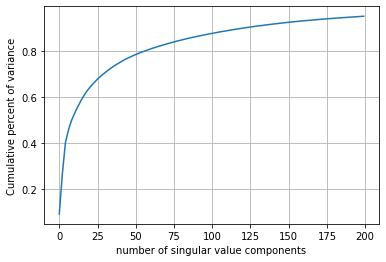

In [42]:
plt.plot(svd_saved.explained_variance_ratio_.cumsum())
plt.xlabel('number of singular value components')
plt.ylabel('Cumulative percent of variance')   
plt.grid()
plt.show()

In [43]:
latent_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
game_name,,,,,,,,,,,,,,,,,,,,,
!Dead Pixels Adventure!,-1.711960e-15,-4.452316e-16,7.813256e-03,4.682171e-02,3.228786e-17,3.251197e+00,-3.801887e-03,-1.538466e-03,-5.749130e-02,6.018415e-12,...,7.274479e-03,-3.221795e-02,1.068706e-01,-1.732720e-01,-6.437970e-02,9.209569e-02,-1.149021e-02,-1.436629e-02,-4.831678e-03,7.331870e-03
"""LOCK""",-4.003214e-16,1.184907e-15,3.994741e-14,3.617861e-13,1.595972e-14,8.993312e-08,7.877491e-12,-5.225843e-11,2.592965e-11,5.452850e-11,...,3.599222e-02,-3.120150e-01,8.472529e-02,6.748533e-02,-1.795144e-01,1.542506e-01,8.491398e-02,6.041660e-02,1.739572e-01,-4.719448e-02
#IDARB,-6.434258e-17,-1.379830e-15,1.368756e-09,2.826467e-09,3.707482e-14,5.703629e-06,-1.938645e-09,1.223982e-07,-7.595638e-08,1.824201e-10,...,1.313862e-01,-6.440234e-01,1.087218e-01,2.059964e-01,1.220008e+00,5.837687e-01,-3.683077e-01,1.565944e-01,6.546574e-01,-7.725227e-02
#SelfieTennis,1.953682e-15,4.612124e-17,2.577463e-09,1.458031e-08,1.832695e-14,2.158670e-06,-3.886310e-09,1.996850e-07,-1.037047e-07,-1.122166e-10,...,-1.482748e-01,-7.469652e-01,2.004183e-01,5.228563e-01,-1.319380e-01,-3.075783e-01,1.911224e-01,-7.022621e-01,6.859888e-02,4.862881e-01
#monstercakes,-5.774631e-17,2.284469e-17,4.576457e-10,1.403789e-09,9.964855e-17,4.611971e-07,-1.132789e-09,1.775674e-08,-4.324350e-08,-2.763017e-12,...,2.508924e-03,7.246873e-03,4.206764e-03,4.646934e-03,-2.091049e-03,-8.369487e-03,-1.750791e-03,-6.465598e-03,3.552871e-03,1.101656e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
某1种青春,5.358357e-13,-1.231708e-12,8.823085e-13,1.494369e-12,2.340000e+02,-6.873130e-14,8.347958e-15,-3.970323e-14,-1.527502e-14,2.158007e-14,...,-6.746985e-14,-1.840155e-13,3.650087e-13,-4.638107e-14,-1.794716e-13,3.142515e-14,-1.523000e-13,-4.936600e-14,5.739064e-13,-1.876198e-13
港詭實錄ParanormalHK,8.367319e-17,-1.294603e-15,6.653689e-08,1.954902e-07,2.391755e-15,2.132666e-03,-2.040332e-08,2.802675e-06,-4.668542e-06,3.949703e-11,...,6.347634e-02,-3.283691e-02,-7.802237e-04,2.965445e-02,-3.965785e-02,-6.376220e-02,-2.031386e-02,-2.331306e-02,3.824763e-02,-2.525949e-02
纸境英雄,6.523975e-16,2.172531e-16,7.221689e-08,5.235486e-07,4.677363e-15,1.123221e-05,-1.081303e-07,3.835323e-06,-2.059897e-06,-1.260043e-11,...,-2.403741e-02,-1.641184e-02,-3.860247e-02,3.123183e-03,2.334355e-02,1.218561e-02,2.498922e-02,-2.582551e-02,9.262151e-02,-4.372349e-02


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
hours_scaled = pd.DataFrame(hours_scaled)

In [ ]:
hours_df.columns.values.tolist()

In [ ]:
test_df = hours_df.copy()
for column in test_df.columns.values.tolist():
    print(column)
    min_col = min(test_df[column])
    max_col = max(test_df[column])
    print(min_col, max_col)
    if max_col != 0:
        for i in 
        print(test_df[column])


In [ ]:
latent_scaled_df = svd.fit_transform(hours_scaled)

In [ ]:
latent_scaled_df

In [ ]:
plt.plot(svd.explained_variance_ratio_.cumsum())
plt.xlabel('number of singular value components')
plt.ylabel('Cumulative percent of variance')   
plt.grid()
plt.show()